# Libraries Import

In [1]:
import math
import re
import os
import itertools as iter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [6]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

In [7]:
import pickle

# Dataset Import

In [8]:
df = pd.read_csv(r"healthcare_diabetes.csv")

# Dataset Exploration

In [9]:
list(df.columns)

['PatientID',
 'Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'Diabetes']

In [10]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

PatientID  Age  Gender   BMI  BloodPressure  GlucoseLevel  \
0    58ad267f   56  Female  30.5            109         192.0   
1    6c7081ea   69    Male  26.3            118         188.0   
2    2a46a9fb   46  Female  26.6            110         187.0   
3    b726744a   32    Male  25.6             81          90.0   
4    a0c44913   60    Male  28.5            157          95.0   
13   efad30fb   28  Female  26.7            139         160.0   
399  57e7dbbe   79    Male  25.9             83         159.0   
192  9c361027   68  Female  31.5             83         199.0   
144  12078eeb   52  Female  24.2             87         148.0   
501  738e4037   45  Female   NaN            146           NaN   
505  c5d462bf   57  Female   NaN            152           NaN   
506  981e29bc   52    Male   NaN             98           NaN   
507  5c382b51   77    Male   NaN             88           NaN   
508  969599ac   26    Male   NaN            126           NaN   
509  0df66cdd   50    Male   NaN            159           NaN   

    PhysicalActivity FamilyHistory  Diabetes  
0               High            No         1  
1             Medium           Yes         1  
2               High           Yes         1  
3             Medium           Yes         0  
4               High            No         0  
13            Medium            No         1  
399             High           Yes         1  
192           Medium            No         1  
144             High           Yes         1  
501           Medium           Yes         1  
505           Medium            No         0  
506              Low           Yes         1  
507              Low            No         1  
508              Low           Yes         0  
509           Medium            No         1

In [11]:
df.describe(include='all')

PatientID         Age  Gender         BMI  BloodPressure  GlucoseLevel  \
count        510  510.000000     510  475.000000     510.000000    475.000000   
unique       500         NaN       2         NaN            NaN           NaN   
top     5c382b51         NaN  Female         NaN            NaN           NaN   
freq           2         NaN     255         NaN            NaN           NaN   
mean         NaN   49.964706     NaN   26.722947     119.786275    134.997895   
std          NaN   18.206055     NaN    5.118280      23.715807     38.999540   
min          NaN   18.000000     NaN    9.600000      80.000000     71.000000   
25%          NaN   35.000000     NaN   23.400000      99.000000    100.000000   
50%          NaN   50.000000     NaN   26.800000     119.000000    136.000000   
75%          NaN   66.000000     NaN   30.250000     141.000000    170.000000   
max          NaN   79.000000     NaN   40.900000     159.000000    199.000000   

       PhysicalActivity FamilyHistory    Diabetes  
count               510           510  510.000000  
unique                3             2         NaN  
top                 Low           Yes         NaN  
freq                179           267         NaN  
mean                NaN           NaN    0.601961  
std                 NaN           NaN    0.489974  
min                 NaN           NaN    0.000000  
25%                 NaN           NaN    0.000000  
50%                 NaN           NaN    1.000000  
75%                 NaN           NaN    1.000000  
max                 NaN           NaN    1.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         510 non-null    object 
 1   Age               510 non-null    int64  
 2   Gender            510 non-null    object 
 3   BMI               475 non-null    float64
 4   BloodPressure     510 non-null    int64  
 5   GlucoseLevel      475 non-null    float64
 6   PhysicalActivity  510 non-null    object 
 7   FamilyHistory     510 non-null    object 
 8   Diabetes          510 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 36.0+ KB


# Dataset Preprocessing

unique values

In [13]:
pd.DataFrame([ df.nunique(), df.dtypes ], index=['Unique Values', 'Data Types'])

PatientID    Age  Gender      BMI BloodPressure GlucoseLevel  \
Unique Values       500     62       2      190            80          128   
Data Types       object  int64  object  float64         int64      float64   

              PhysicalActivity FamilyHistory Diabetes  
Unique Values                3             2        2  
Data Types              object        object    int64

features type

In [14]:
TARGET = 'Diabetes'
INPUT_FEATURES = ['PatientID', 'Age', 'Gender', 'BMI', 'BloodPressure', 'GlucoseLevel', 'PhysicalActivity', 'FamilyHistory']
CATEGORICAL_FEATURES =  ['PatientID', 'Gender', 'PhysicalActivity', 'FamilyHistory']
NUMERICAL_FEATURES = ['Age', 'BMI', 'BloodPressure', 'GlucoseLevel']

In [15]:
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)
df[TARGET] = df[TARGET].astype(int)

In [16]:
pd.DataFrame([ df.nunique(), df.dtypes ])

PatientID      Age  Gender      BMI BloodPressure GlucoseLevel  \
0       500       62       2      190            80          128   
1    object  float64  object  float64       float64      float64   

  PhysicalActivity FamilyHistory Diabetes  
0                3             2        2  
1           object        object    int64

Unique Values

In [17]:
for cat_feat in CATEGORICAL_FEATURES[1:]:
    print(f"{cat_feat : <18}: {df[cat_feat].unique()}")

Gender            : ['Female' 'Male']
PhysicalActivity  : ['High' 'Medium' 'Low']
FamilyHistory     : ['No' 'Yes']


Duplicates

In [18]:
df.duplicated().sum()

np.int64(10)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

null values

In [21]:
pd.DataFrame(
    {
    "Count" : df.isna().sum().sort_values(ascending=False),
    "percent %" : 100.0 * df.isna().sum().sort_values(ascending=False) / len(df),
    }
).T

BMI  GlucoseLevel  PatientID  Gender  Age  BloodPressure  \
Count      25.0          25.0        0.0     0.0  0.0            0.0   
percent %   5.0           5.0        0.0     0.0  0.0            0.0   

           PhysicalActivity  FamilyHistory  Diabetes  
Count                   0.0            0.0       0.0  
percent %               0.0            0.0       0.0

In [22]:
print(f"Rows before removing all null rows: {len(df)}")
df = df[ ~df.isna().all(axis=1) ]
print(f"Rows after removing all null rows: {len(df)}")

Rows before removing all null rows: 500
Rows after removing all null rows: 500


In [23]:
def df_mask_over(df, cat_features_to_mask):
    all_unique_values = [list(df[cat_feat].unique()) for cat_feat in cat_features_to_mask]

    for combine_i in iter.product(*all_unique_values):
        mask = True
        for cat_feat, cat_val in zip(cat_features_to_mask, combine_i):
            mask &= (df[cat_feat] == cat_val)

        masked_df = df[mask]

        yield combine_i, masked_df.index

In [24]:
def replace_null(to_edit_features, helper_features, method='median'):
    for combine_i, indices_i in df_mask_over(df, helper_features):
        
        print(f"Combination {str(combine_i):<50} has {len(indices_i) : 6d} rows, ", end='')

        if method == 'median':
            to_replace_value = df.loc[indices_i, to_edit_features].median()
        elif method == 'mean': 
            to_replace_value = df.loc[indices_i, to_edit_features].mean()
        elif method == 'mode':
            to_replace_value = df.loc[indices_i, to_edit_features].mode()[0]
        else:
            raise ValueError(f"Unknown method: {method}")
        
        print(f"{method.capitalize()}({to_edit_features}) = {to_replace_value}")
        df.loc[indices_i, to_edit_features] = df.loc[indices_i, to_edit_features].fillna(df.loc[indices_i, to_edit_features].median())

In [25]:
replace_null('BMI', ['Gender', 'PhysicalActivity'], method='median')

Combination ('Female', 'High')                                 has     95 rows, Median(BMI) = 26.8
Combination ('Female', 'Medium')                               has     79 rows, Median(BMI) = 26.8
Combination ('Female', 'Low')                                  has     76 rows, Median(BMI) = 26.6
Combination ('Male', 'High')                                   has     82 rows, Median(BMI) = 27.0
Combination ('Male', 'Medium')                                 has     72 rows, Median(BMI) = 26.3
Combination ('Male', 'Low')                                    has     96 rows, Median(BMI) = 27.85


In [26]:
replace_null('GlucoseLevel', ['Gender', 'PhysicalActivity', 'FamilyHistory'], method='median')

Combination ('Female', 'High', 'No')                           has     42 rows, Median(GlucoseLevel) = 132.0
Combination ('Female', 'High', 'Yes')                          has     53 rows, Median(GlucoseLevel) = 138.0
Combination ('Female', 'Medium', 'No')                         has     37 rows, Median(GlucoseLevel) = 135.0
Combination ('Female', 'Medium', 'Yes')                        has     42 rows, Median(GlucoseLevel) = 147.0
Combination ('Female', 'Low', 'No')                            has     40 rows, Median(GlucoseLevel) = 133.5
Combination ('Female', 'Low', 'Yes')                           has     36 rows, Median(GlucoseLevel) = 131.0
Combination ('Male', 'High', 'No')                             has     40 rows, Median(GlucoseLevel) = 122.5
Combination ('Male', 'High', 'Yes')                            has     42 rows, Median(GlucoseLevel) = 126.5
Combination ('Male', 'Medium', 'No')                           has     36 rows, Median(GlucoseLevel) = 118.0
Combination ('Male'

In [27]:
pd.DataFrame(
    {
    "Count" : df.isna().sum().sort_values(ascending=False),
    "percent %" : 100.0 * df.isna().sum().sort_values(ascending=False) / len(df),
    }
).T

PatientID  Age  Gender  BMI  BloodPressure  GlucoseLevel  \
Count            0.0  0.0     0.0  0.0            0.0           0.0   
percent %        0.0  0.0     0.0  0.0            0.0           0.0   

           PhysicalActivity  FamilyHistory  Diabetes  
Count                   0.0            0.0       0.0  
percent %               0.0            0.0       0.0

Drop Unwanted Features

In [28]:
def drop_unnwanted_features(df, features_to_drop):
    print(f"Dropping features: {features_to_drop}")

    if features_to_drop in list(df.columns):
        df = df.drop(columns=features_to_drop)

    if features_to_drop in INPUT_FEATURES:
        INPUT_FEATURES.remove(features_to_drop)

    if features_to_drop in CATEGORICAL_FEATURES:
        CATEGORICAL_FEATURES.remove(features_to_drop)

    if features_to_drop in NUMERICAL_FEATURES:
        NUMERICAL_FEATURES.remove(features_to_drop)
        
    return df

In [29]:
df = drop_unnwanted_features(df, 'PatientID')

Dropping features: PatientID


In [30]:
list(df.columns)

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'Diabetes']

# EDA & Dataset Visualization

In [31]:
plt.style.use(plt.style.available[12])

Distribuation

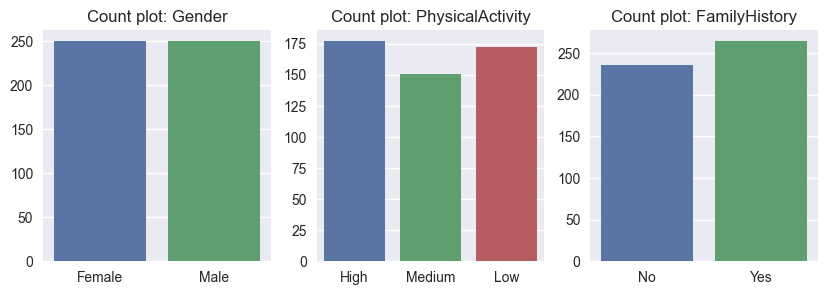

In [32]:
N_COLS = 3
N_ROWS = math.ceil(len(CATEGORICAL_FEATURES) / N_COLS)

plt.figure(figsize=(10,3))

for i, cat_feature in enumerate(CATEGORICAL_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Count plot: {cat_feature}")
    sns.countplot(df, x=cat_feature, hue=cat_feature,legend=False)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

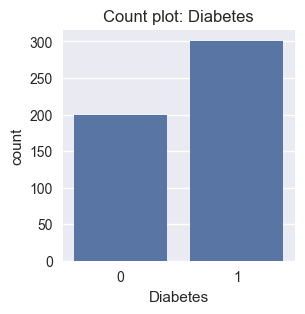

In [33]:
plt.figure(figsize=(3,3))
plt.title(f"Count plot: {TARGET}")
sns.countplot(df, x=TARGET)
plt.show()

* There are bias in target column

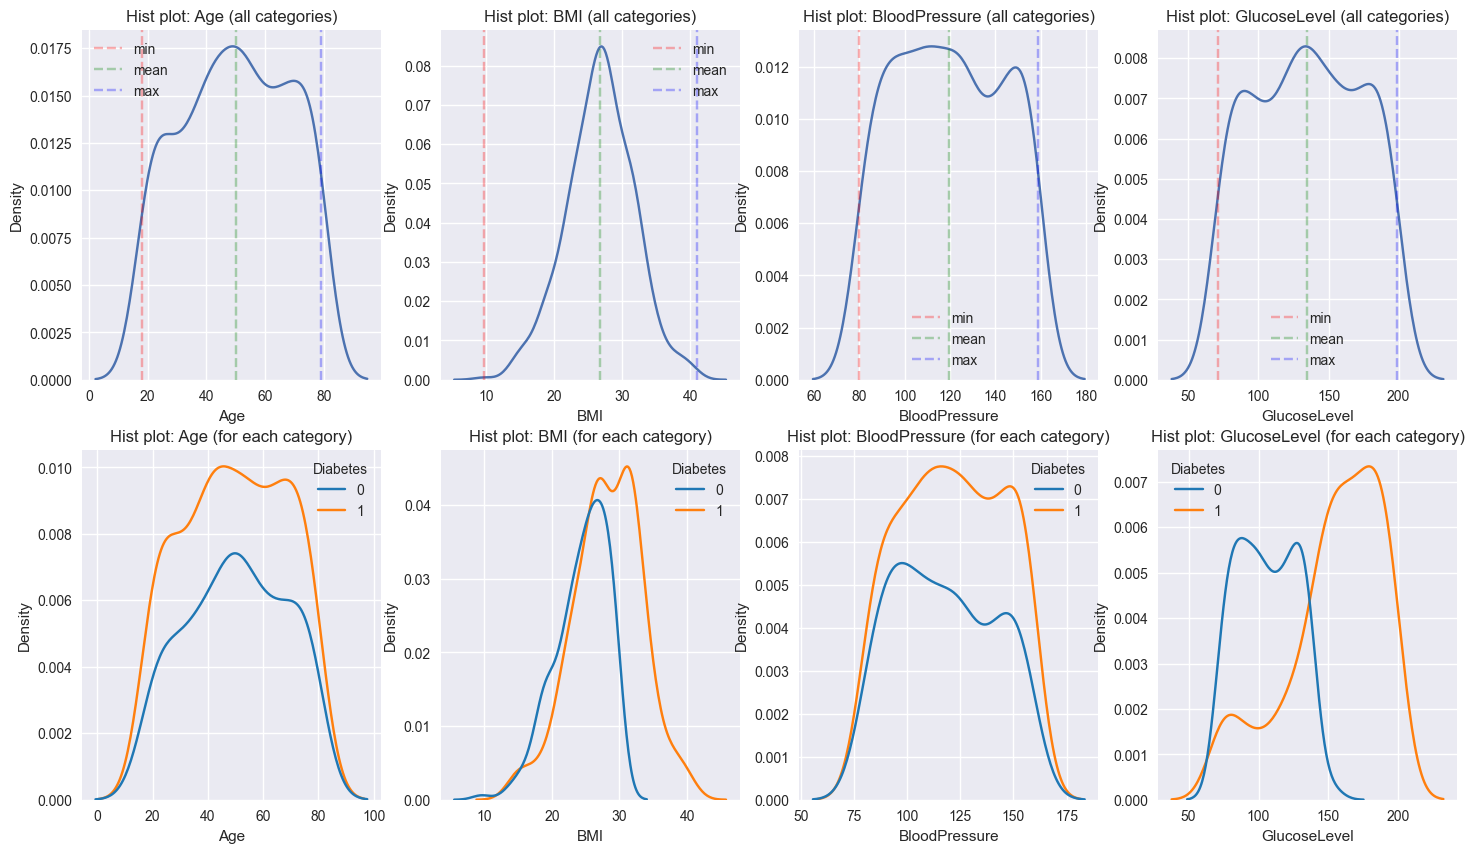

In [34]:
ROW_WIDTH = 6
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(27,10))

    plt.subplot(2,ROW_WIDTH, temp + 1)
    plt.title(f"Hist plot: {num_feature} (all categories)")
    sns.kdeplot(df, x=num_feature, )
    
    plt.axvline(x= df[num_feature].min() , label="min", color='r', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].mean() , label="mean", color='g', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].max() , label="max", color='b', linestyle='--', alpha = 0.3)

    plt.legend()


    plt.subplot(2,ROW_WIDTH, (temp + 1) + ROW_WIDTH)
    plt.title(f"Hist plot: {num_feature} (for each category)")
    sns.kdeplot(df, x=num_feature, hue=TARGET, palette='tab10')
    
    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()

* Who has Diabetes, May has high BMI
* Who has Diabetes, May has high Glucose level

Box plot

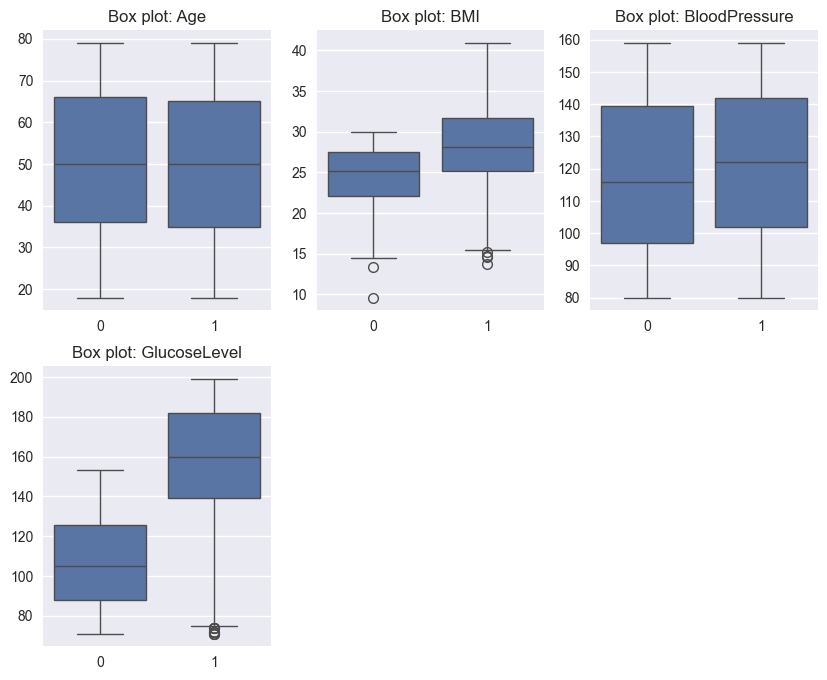

In [35]:
N_COLS = 3
N_ROWS = math.ceil(len(NUMERICAL_FEATURES) / N_COLS)

plt.figure(figsize=(10,8))

for i, feature in enumerate(NUMERICAL_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Box plot: {feature}")
    sns.boxplot(df, x=TARGET, y=feature)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

EDA

In [36]:
print("Q1: Does age affect diabetes risk?")
df.groupby(TARGET)[NUMERICAL_FEATURES[0]].mean().T

Q1: Does age affect diabetes risk?


Diabetes
0    50.271357
1    49.671096
Name: Age, dtype: float64

In [37]:
print("Q2: Does high glucose level increase diabetes risk? ")
df.groupby(TARGET)[NUMERICAL_FEATURES[3]].mean().T

Q2: Does high glucose level increase diabetes risk? 


Diabetes
0    106.017588
1    154.124585
Name: GlucoseLevel, dtype: float64

In [38]:
print("Q3: How does BMI vary between diabetic and non-diabetic patients?")
df.groupby(TARGET)[NUMERICAL_FEATURES[1]].mean().T

Q3: How does BMI vary between diabetic and non-diabetic patients?


Diabetes
0    24.445980
1    28.256977
Name: BMI, dtype: float64

In [39]:
print("Q4: Does physical activity level affect diabetes risk?\n")

for label, group in df.groupby(TARGET):
    print(f"\nDiabetes = {label}")
    print(group["PhysicalActivity"].value_counts(normalize=True))


Q4: Does physical activity level affect diabetes risk?


Diabetes = 0
PhysicalActivity
High      0.381910
Medium    0.311558
Low       0.306533
Name: proportion, dtype: float64

Diabetes = 1
PhysicalActivity
Low       0.368771
High      0.335548
Medium    0.295681
Name: proportion, dtype: float64


Group by practise

In [40]:
df.groupby(CATEGORICAL_FEATURES[1])[NUMERICAL_FEATURES[1::2]].mean().T

PhysicalActivity        High         Low      Medium
BMI                26.840113   26.980233   26.349669
GlucoseLevel      133.141243  138.843023  132.728477

In [41]:
df.groupby(CATEGORICAL_FEATURES[2])[TARGET].value_counts()

FamilyHistory  Diabetes
No             1           142
               0            94
Yes            1           159
               0           105
Name: count, dtype: int64

# Outliers

In [42]:
# def plot_box(features, hue):
#     ROW_WIDTH = 6
#     temp = 0

#     for num_feature in features:
#         if temp == 0:
#             plt.figure(figsize=(25,5))

#         plt.subplot(1,ROW_WIDTH, temp + 1)
#         plt.title(f"Box plot: {num_feature}")
#         sns.boxplot(df, x=num_feature, hue=hue, palette='rocket')

#         if temp == ROW_WIDTH - 1:
#             plt.show()

#         temp = (temp + 1) % ROW_WIDTH

#     if temp != ROW_WIDTH - 1:
#         plt.show()    

In [43]:
# plot_box(NUMERICAL_FEATURES, TARGET)

In [44]:
# def IQR(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
    
#     IQR = Q3 - Q1

#     min_v = Q1 - 1.5 * IQR
#     max_v = Q3 + 1.5 * IQR

#     return series.clip(lower=min_v, upper=max_v)


In [45]:
# for num_feature in NUMERICAL_FEATURES:
#     for gender_category in set(df[TARGET].values):
#         mask = df[TARGET] == gender_category
#         df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

In [46]:
# plot_box(NUMERICAL_FEATURES, TARGET)

In [47]:
# plot_box([TARGET],None)

# Feauter Engineering

In [48]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory']

In [49]:
def add_num_feature(new_feature, base_feature, operation_fun):
    df[new_feature] = df[base_feature].apply(operation_fun)

    if new_feature not in INPUT_FEATURES:
        NUMERICAL_FEATURES.append(new_feature)
        INPUT_FEATURES.append(new_feature)

In [50]:
OLD_NUMERICAL_FEATURES = NUMERICAL_FEATURES.copy()

In [51]:
# X ^ 2

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'{feature} ^ 2',
        base_feature = feature,
        operation_fun = lambda x: x ** 2
    )

# X ^ 3

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'{feature} ^ 3',
        base_feature = feature,
        operation_fun = lambda x: x ** 3
    )

# X ^ 0.5

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'{feature} ^ 0.5',
        base_feature = feature,
        operation_fun = lambda x: x ** 0.5
    )

In [52]:
# Log_e (X)

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'log_e ({feature})',
        base_feature = feature,
        operation_fun = lambda x: math.log(x)
    )

# Log_10 (X)

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'log_10 ({feature})',
        base_feature = feature,
        operation_fun = lambda x: math.log(x, 10)
    )

# exp (X)

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'exp ({feature})',
        base_feature = feature,
        operation_fun = lambda x: math.exp(x)
    )

In [53]:
# 100 / X

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'100 / {feature}',
        base_feature = feature,
        operation_fun = lambda x: 100 / x
    )

# 100 / (X^2)

for feature in OLD_NUMERICAL_FEATURES:
    add_num_feature(
        new_feature = f'100 / ({feature}^2)',
        base_feature = feature,
        operation_fun = lambda x: 100 / (x ** 2)
    )

In [54]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'Age ^ 2',
 'BMI ^ 2',
 'BloodPressure ^ 2',
 'GlucoseLevel ^ 2',
 'Age ^ 3',
 'BMI ^ 3',
 'BloodPressure ^ 3',
 'GlucoseLevel ^ 3',
 'Age ^ 0.5',
 'BMI ^ 0.5',
 'BloodPressure ^ 0.5',
 'GlucoseLevel ^ 0.5',
 'log_e (Age)',
 'log_e (BMI)',
 'log_e (BloodPressure)',
 'log_e (GlucoseLevel)',
 'log_10 (Age)',
 'log_10 (BMI)',
 'log_10 (BloodPressure)',
 'log_10 (GlucoseLevel)',
 'exp (Age)',
 'exp (BMI)',
 'exp (BloodPressure)',
 'exp (GlucoseLevel)',
 '100 / Age',
 '100 / BMI',
 '100 / BloodPressure',
 '100 / GlucoseLevel',
 '100 / (Age^2)',
 '100 / (BMI^2)',
 '100 / (BloodPressure^2)',
 '100 / (GlucoseLevel^2)']

# Correlation Matrix

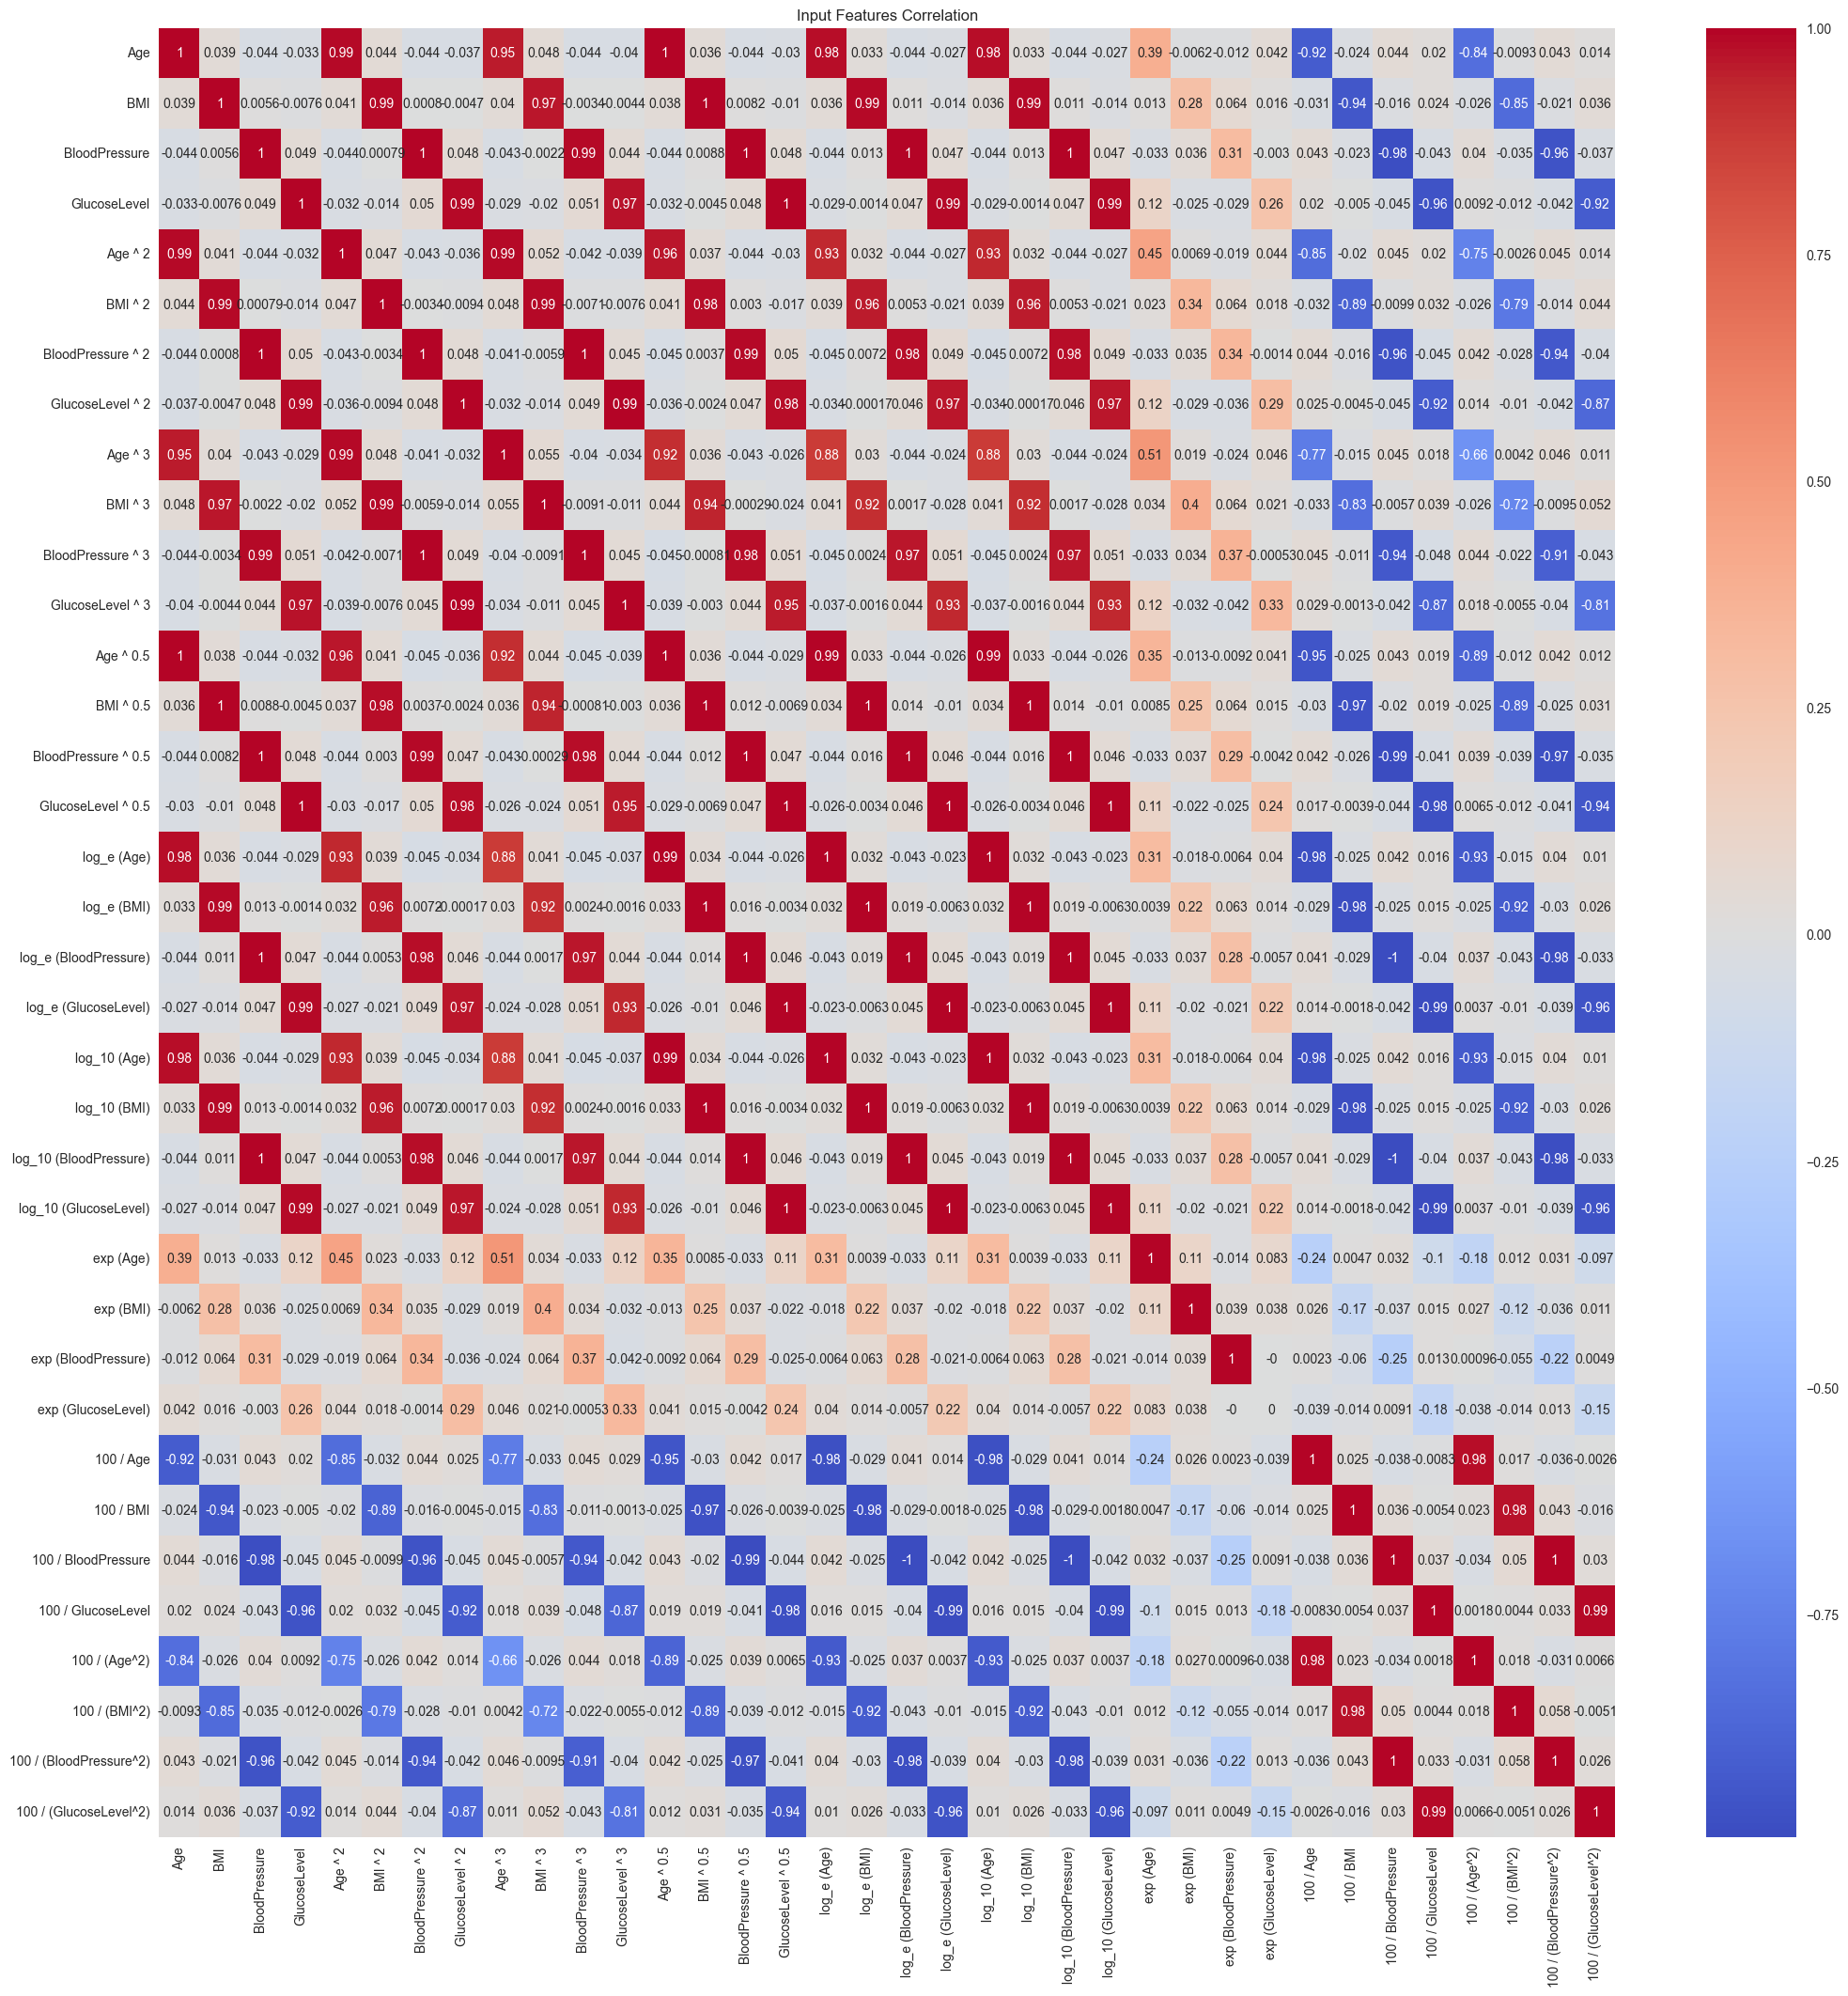

In [55]:
plt.figure(figsize=(25, 25)) 

plt.title("Input Features Correlation")

sns.heatmap( 
    df[NUMERICAL_FEATURES].corr(),
    annot=True,
    cmap='coolwarm',
    )

plt.show()

In [56]:
# Drop highly correlated features

to_drop_features = set()

for feature_1, feature_2 in iter.combinations(NUMERICAL_FEATURES[::-1], 2):
    if feature_2 in to_drop_features or feature_1 in to_drop_features:
        continue

    corr_val = abs(df[feature_1].corr(df[feature_2]))

    if abs(corr_val) > 0.9:
        print(f"Dropping {feature_1} because it is highly correlated with {feature_2}".ljust(100), f'(corr={corr_val:.4f})')
        to_drop_features.add(feature_1)

for feature in to_drop_features:
    df = drop_unnwanted_features(df, feature)

Dropping 100 / (GlucoseLevel^2) because it is highly correlated with 100 / GlucoseLevel              (corr=0.9913)
Dropping 100 / (BloodPressure^2) because it is highly correlated with 100 / BloodPressure            (corr=0.9958)
Dropping 100 / (BMI^2) because it is highly correlated with 100 / BMI                                (corr=0.9759)
Dropping 100 / (Age^2) because it is highly correlated with 100 / Age                                (corr=0.9829)
Dropping 100 / GlucoseLevel because it is highly correlated with log_10 (GlucoseLevel)               (corr=0.9905)
Dropping 100 / BloodPressure because it is highly correlated with log_10 (BloodPressure)             (corr=0.9957)
Dropping 100 / BMI because it is highly correlated with log_10 (BMI)                                 (corr=0.9831)
Dropping 100 / Age because it is highly correlated with log_10 (Age)                                 (corr=0.9793)
Dropping log_10 (GlucoseLevel) because it is highly correlated with log_e (Gluco

In [57]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'exp (Age)',
 'exp (BMI)',
 'exp (BloodPressure)',
 'exp (GlucoseLevel)']

F1 test

F-value: Measures how much the means between groups differ relative to the variance within the groups. Higher = more likely the feature is important.

p-value: Probability that the observed difference is due to chance.

p < 0.05 → Statistically significant

p ≥ 0.05 → Not significant

In [58]:
f_values, p_values = f_classif(df[NUMERICAL_FEATURES], df[TARGET])

for i in range(len(NUMERICAL_FEATURES)):
    print(f"{NUMERICAL_FEATURES[i]:15s}: F-value = {f_values[i]:6.3f}, p-value = {p_values[i]:3.3f}")

Age            : F-value =  0.130, p-value = 0.719
BMI            : F-value = 81.067, p-value = 0.000
BloodPressure  : F-value =  2.487, p-value = 0.115
GlucoseLevel   : F-value = 309.047, p-value = 0.000
exp (Age)      : F-value =  1.546, p-value = 0.214
exp (BMI)      : F-value =  3.709, p-value = 0.055
exp (BloodPressure): F-value =  0.129, p-value = 0.720
exp (GlucoseLevel): F-value =  7.877, p-value = 0.005


i should drop features which has p value > 0.05, but i wont drop them to follow task rules

In [59]:
# df = drop_unnwanted_features(df, 'Age') # p value very high
# df = drop_unnwanted_features(df, 'BloodPressure') # p value very high

# df = drop_unnwanted_features(df, 'exp (Age)') # p value very high
# df = drop_unnwanted_features(df, 'exp (BloodPressure)') # p value very high

In [60]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'exp (Age)',
 'exp (BMI)',
 'exp (BloodPressure)',
 'exp (GlucoseLevel)']

# Encoding & Scaling

In [61]:
CATEGORICAL_FEATURES

['Gender', 'PhysicalActivity', 'FamilyHistory']

In [62]:
CATEGORICAL_ORDINAL = 'PhysicalActivity'
CATEGORICAL_NOMINAL = ['Gender','FamilyHistory']

In [63]:
trainable_df = df.copy()

In [64]:
trainable_df = pd.get_dummies(trainable_df, columns=CATEGORICAL_NOMINAL, drop_first=False, dtype=int)

In [65]:
label_encoder =  LabelEncoder()
label_encoder.fit(trainable_df[CATEGORICAL_ORDINAL])

LabelEncoder()

In [66]:
label_encoder.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [67]:
# fix order of categories
label_encoder.classes_ = np.array(['Low', 'Medium', 'High']).astype(np.object_)

In [68]:
label_encoder.classes_

array(['Low', 'Medium', 'High'], dtype=object)

In [69]:
trainable_df.loc[:,CATEGORICAL_ORDINAL] = label_encoder.transform(df[CATEGORICAL_ORDINAL]) + 1 
# to make it 1,2,3 instead of 0,1,2 because 0 can hide its weight in the equation (X.W) -> x=0 -> entier term = 0

In [70]:
min_max_scaller = MinMaxScaler()

min_max_scaller.fit(trainable_df[NUMERICAL_FEATURES])

MinMaxScaler()

In [71]:
trainable_df.loc[:,NUMERICAL_FEATURES] = min_max_scaller.transform(trainable_df[NUMERICAL_FEATURES])

In [72]:
df.head()

Age  Gender   BMI  BloodPressure  GlucoseLevel PhysicalActivity  \
0  56.0  Female  30.5          109.0         192.0             High   
1  69.0    Male  26.3          118.0         188.0           Medium   
2  46.0  Female  26.6          110.0         187.0             High   
3  32.0    Male  25.6           81.0          90.0           Medium   
4  60.0    Male  28.5          157.0          95.0             High   

  FamilyHistory  Diabetes     exp (Age)     exp (BMI)  exp (BloodPressure)  \
0            No         1  2.091659e+24  1.761902e+13         2.178204e+47   
1           Yes         1  9.253782e+29  2.642073e+11         1.765017e+51   
2           Yes         1  9.496119e+19  3.566426e+11         5.920972e+47   
3           Yes         0  7.896296e+13  1.312015e+11         1.506097e+35   
4            No         0  1.142007e+26  2.384475e+12         1.528388e+68   

   exp (GlucoseLevel)  
0        2.424044e+83  
1        4.439792e+81  
2        1.633308e+81  
3        1.220403e+39  
4        1.811239e+41

In [73]:
trainable_df.head()

Age       BMI  BloodPressure  GlucoseLevel PhysicalActivity  Diabetes  \
0  0.622951  0.667732       0.367089      0.945312                3         1   
1  0.836066  0.533546       0.481013      0.914062                2         1   
2  0.459016  0.543131       0.379747      0.906250                3         1   
3  0.229508  0.511182       0.012658      0.148438                2         0   
4  0.688525  0.603834       0.974684      0.187500                3         0   

      exp (Age)     exp (BMI)  exp (BloodPressure)  exp (GlucoseLevel)  \
0  1.026188e-10  3.043248e-05         1.928750e-22        9.118820e-04   
1  4.539993e-05  4.563526e-07         1.562882e-18        1.670170e-05   
2  4.658886e-15  6.160116e-07         5.242886e-22        6.144212e-06   
3  3.873994e-21  2.266180e-07         8.430053e-35        4.590938e-48   
4  5.602796e-09  4.118589e-06         1.353353e-01        6.813557e-46   

   Gender_Female  Gender_Male  FamilyHistory_No  FamilyHistory_Yes  
0              1            0                 1                  0  
1              0            1                 0                  1  
2              1            0                 0                  1  
3              0            1                 0                  1  
4              0            1                 1                  0

In [74]:
list(trainable_df.columns)

['Age',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'Diabetes',
 'exp (Age)',
 'exp (BMI)',
 'exp (BloodPressure)',
 'exp (GlucoseLevel)',
 'Gender_Female',
 'Gender_Male',
 'FamilyHistory_No',
 'FamilyHistory_Yes']

# Dataset Splitting

In [75]:
X_train,X_test, y_train, y_test = train_test_split( 
    trainable_df.drop(TARGET, axis=1), 
    trainable_df.loc[:, TARGET],
    test_size=0.25,
    random_state=41,
    stratify=trainable_df.loc[:, TARGET],
  )

In [76]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (375, 13)
y_train.shape= (375,)
X_test.shape= (125, 13)
y_test.shape= (125,)


In [77]:
y_train.value_counts()

Diabetes
1    226
0    149
Name: count, dtype: int64

In [78]:
y_test.value_counts()

Diabetes
1    75
0    50
Name: count, dtype: int64

In [79]:
list(X_train.columns)

['Age',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'exp (Age)',
 'exp (BMI)',
 'exp (BloodPressure)',
 'exp (GlucoseLevel)',
 'Gender_Female',
 'Gender_Male',
 'FamilyHistory_No',
 'FamilyHistory_Yes']

# Class Weights

In [80]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weights = dict(zip(np.unique(y_train), weights))

print(class_weights)

{np.int64(0): np.float64(1.2583892617449663), np.int64(1): np.float64(0.8296460176991151)}


# Model Definition & Training

In [81]:
CACHE_MODELS_DIR_NAME = 'models_cache' 
os.makedirs(CACHE_MODELS_DIR_NAME, exist_ok=True)

In [82]:
class CustomModel:
    def __init__(self, name, model, extra_train_param = None ):

        self.name = str(name)
        self.model = model
        self.extra_train_param = extra_train_param

        self.y_train_hat = None
        self.y_test_hat = None
        
        self.load()


    def fit(self, x_train, y_train):
        if self.trained == False:
            
            if self.extra_train_param is None:
                self.model.fit(x_train, y_train)
            else:
                self.model.fit(x_train, y_train, **self.extra_train_param)

            self.trained = True
            self.save()
    
    def prdict_on_train(self, x_train):
        if self.y_train_hat is None:
            self.y_train_hat = self.model.predict(x_train)
    
    def prdict_on_test(self, x_test):
        if self.y_test_hat is None:
            self.y_test_hat = self.model.predict(x_test)
    
    def save(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'
        with open(file_path, 'wb') as f:
           pickle.dump(self.model, f)        

    def load(self):
        file_name = re.sub('', '', str(self.name).lower())
        file_path = CACHE_MODELS_DIR_NAME + '/' + file_name + '.pickle'

        if os.path.exists(file_path):
            with open(file_path, 'rb') as f:
                self.model = pickle.load(f)
            self.trained = True
        else:
            self.trained = False

In [83]:
models_list = []

models_list.append(CustomModel("Logistic Regression", LogisticRegression(class_weight=class_weights)))

models_list.append(CustomModel("SVC linear kernel", SVC(kernel='linear', class_weight=class_weights)))
models_list.append(CustomModel("SVC poly kernel", SVC(kernel='poly', class_weight=class_weights)))
models_list.append(CustomModel("SVC rbf kernel", SVC(kernel='rbf', class_weight=class_weights)))
models_list.append(CustomModel("SVC rbf sigmoid", SVC(kernel='sigmoid', class_weight=class_weights)))

models_list.append(CustomModel("Decision Tree max-depth=4", DecisionTreeClassifier(max_depth=4, class_weight=class_weights)))
models_list.append(CustomModel("Decision Tree max-depth=5", DecisionTreeClassifier(max_depth=5, class_weight=class_weights)))
models_list.append(CustomModel("Decision Tree max-depth=6", DecisionTreeClassifier(max_depth=6, class_weight=class_weights)))
models_list.append(CustomModel("Decision Tree max-depth=7", DecisionTreeClassifier(max_depth=7, class_weight=class_weights)))

models_list.append(CustomModel("Random Forest, trees=3", RandomForestClassifier(n_estimators=3, class_weight=class_weights)))
models_list.append(CustomModel("Random Forest, trees=4", RandomForestClassifier(n_estimators=4, class_weight=class_weights)))
models_list.append(CustomModel("Random Forest, trees=5", RandomForestClassifier(n_estimators=5, class_weight=class_weights)))


# models_list.append(CustomModel("Ada Boost estimator=3 max_depth=2", AdaBoostClassifier(n_estimators=3, estimator=RandomForestClassifier(max_depth=1))))
# models_list.append(CustomModel("Ada Boost estimator=5 max_depth=2", AdaBoostClassifier(n_estimators=5, estimator=RandomForestClassifier(max_depth=1))))
# models_list.append(CustomModel("Ada Boost estimator=7 max_depth=2", AdaBoostClassifier(n_estimators=7, estimator=RandomForestClassifier(max_depth=1))))

# models_list.append(CustomModel("Gradient Boosting estimator=2", GradientBoostingClassifier(n_estimators=2)))
# models_list.append(CustomModel("Gradient Boosting estimator=3", GradientBoostingClassifier(n_estimators=3)))
# models_list.append(CustomModel("Gradient Boosting estimator=5", GradientBoostingClassifier(n_estimators=5)))


In [84]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Train {model.name}')
    model.fit(X_train,y_train)

  1/12. Train Logistic Regression
  2/12. Train SVC linear kernel
  3/12. Train SVC poly kernel
  4/12. Train SVC rbf kernel
  5/12. Train SVC rbf sigmoid
  6/12. Train Decision Tree max-depth=4
  7/12. Train Decision Tree max-depth=5
  8/12. Train Decision Tree max-depth=6
  9/12. Train Decision Tree max-depth=7
 10/12. Train Random Forest, trees=3
 11/12. Train Random Forest, trees=4
 12/12. Train Random Forest, trees=5


# Model Prediction & Evaluation

Prediction

In [85]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on train data')
    model.prdict_on_train(X_train)

  1/12. Predict Logistic Regression on train data
  2/12. Predict SVC linear kernel on train data
  3/12. Predict SVC poly kernel on train data
  4/12. Predict SVC rbf kernel on train data
  5/12. Predict SVC rbf sigmoid on train data
  6/12. Predict Decision Tree max-depth=4 on train data
  7/12. Predict Decision Tree max-depth=5 on train data
  8/12. Predict Decision Tree max-depth=6 on train data
  9/12. Predict Decision Tree max-depth=7 on train data
 10/12. Predict Random Forest, trees=3 on train data
 11/12. Predict Random Forest, trees=4 on train data
 12/12. Predict Random Forest, trees=5 on train data


In [86]:
for i, model in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Predict {model.name} on test data')
    model.prdict_on_test(X_test)

  1/12. Predict Logistic Regression on test data
  2/12. Predict SVC linear kernel on test data
  3/12. Predict SVC poly kernel on test data
  4/12. Predict SVC rbf kernel on test data
  5/12. Predict SVC rbf sigmoid on test data
  6/12. Predict Decision Tree max-depth=4 on test data
  7/12. Predict Decision Tree max-depth=5 on test data
  8/12. Predict Decision Tree max-depth=6 on test data
  9/12. Predict Decision Tree max-depth=7 on test data
 10/12. Predict Random Forest, trees=3 on test data
 11/12. Predict Random Forest, trees=4 on test data
 12/12. Predict Random Forest, trees=5 on test data


Evaluation

In [87]:
evaluation_dataset = []

for i, model in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model.name}')

    accuracy_score_train = accuracy_score( y_train, model.y_train_hat )
    accuracy_score_test = accuracy_score( y_test, model.y_test_hat )

    recall_score_train = recall_score( y_train, model.y_train_hat )
    recall_score_test = recall_score( y_test, model.y_test_hat )

    precision_score_train = precision_score( y_train, model.y_train_hat )
    precision_score_test = precision_score( y_test, model.y_test_hat )

    f1_score_train = f1_score( y_train, model.y_train_hat )
    f1_score_test = f1_score( y_test, model.y_test_hat)

    roc_auc_score_train = roc_auc_score( y_train, model.y_train_hat )
    roc_auc_score_test = roc_auc_score( y_test, model.y_test_hat)


    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_train, 
        'recall_score': recall_score_train, 'f1_score':f1_score_train, 
        'roc_auc_score':roc_auc_score_train, 'precision_score':precision_score_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model.name, 'accuracy_score': accuracy_score_test, 
        'recall_score': recall_score_test, 'f1_score':f1_score_test, 
        'roc_auc_score':roc_auc_score_test, 'precision_score':precision_score_test,
        'data':'test'}
    )


    print(evaluation_dataset[-2])
    print(evaluation_dataset[-1])
    print('\n')


evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/12. Evaluate Logistic Regression
{'model': 'Logistic Regression', 'accuracy_score': 0.8373333333333334, 'recall_score': 0.8185840707964602, 'f1_score': 0.8584686774941995, 'roc_auc_score': 0.8421779414384986, 'precision_score': 0.9024390243902439, 'data': 'train'}
{'model': 'Logistic Regression', 'accuracy_score': 0.848, 'recall_score': 0.8266666666666667, 'f1_score': 0.8671328671328671, 'roc_auc_score': 0.8533333333333333, 'precision_score': 0.9117647058823529, 'data': 'test'}


02/12. Evaluate SVC linear kernel
{'model': 'SVC linear kernel', 'accuracy_score': 0.8266666666666667, 'recall_score': 0.7964601769911505, 'f1_score': 0.8470588235294118, 'roc_auc_score': 0.8344716992338301, 'precision_score': 0.9045226130653267, 'data': 'train'}
{'model': 'SVC linear kernel', 'accuracy_score': 0.856, 'recall_score': 0.8, 'f1_score': 0.8695652173913043, 'roc_auc_score': 0.87, 'precision_score': 0.9523809523809523, 'data': 'test'}


03/12. Evaluate SVC poly kernel
{'model': 'SVC poly kernel'

In [88]:
evaluation_dataset.sort_values('f1_score', ascending=False)

model  accuracy_score  recall_score  f1_score  \
22     Random Forest, trees=5        0.997333      1.000000  0.997792   
16  Decision Tree max-depth=7        0.997333      0.995575  0.997783   
14  Decision Tree max-depth=6        0.994667      1.000000  0.995595   
18     Random Forest, trees=3        0.992000      0.995575  0.993377   
20     Random Forest, trees=4        0.984000      0.973451  0.986547   
12  Decision Tree max-depth=5        0.970667      0.951327  0.975057   
23     Random Forest, trees=5        0.968000      0.986667  0.973684   
15  Decision Tree max-depth=6        0.960000      0.973333  0.966887   
19     Random Forest, trees=3        0.960000      0.973333  0.966887   
10  Decision Tree max-depth=4        0.960000      0.933628  0.965675   
11  Decision Tree max-depth=4        0.960000      0.933333  0.965517   
17  Decision Tree max-depth=7        0.952000      0.960000  0.960000   
21     Random Forest, trees=4        0.952000      0.946667  0.959459   
13  Decision Tree max-depth=5        0.952000      0.933333  0.958904   
4             SVC poly kernel        0.853333      0.845133  0.874142   
3           SVC linear kernel        0.856000      0.800000  0.869565   
1         Logistic Regression        0.848000      0.826667  0.867133   
7              SVC rbf kernel        0.848000      0.786667  0.861314   
6              SVC rbf kernel        0.842667      0.796460  0.859189   
5             SVC poly kernel        0.840000      0.813333  0.859155   
0         Logistic Regression        0.837333      0.818584  0.858469   
2           SVC linear kernel        0.826667      0.796460  0.847059   
8             SVC rbf sigmoid        0.581333      0.628319  0.643991   
9             SVC rbf sigmoid        0.512000      0.466667  0.534351   

    roc_auc_score  precision_score   data  
22       0.996644         0.995595  train  
16       0.997788         1.000000  train  
14       0.993289         0.991228  train  
18       0.991076         0.991189  train  
20       0.986726         1.000000  train  
12       0.975664         1.000000  train  
23       0.963333         0.961039   test  
15       0.956667         0.960526   test  
19       0.956667         0.960526   test  
10       0.966814         1.000000  train  
11       0.966667         1.000000   test  
17       0.950000         0.960000   test  
21       0.953333         0.972603   test  
13       0.956667         0.985915   test  
4        0.855452         0.905213  train  
3        0.870000         0.952381   test  
1        0.853333         0.911765   test  
7        0.863333         0.951613   test  
6        0.854606         0.932642  train  
5        0.846667         0.910448   test  
0        0.842178         0.902439  train  
2        0.834472         0.904523  train  
8        0.569193         0.660465  train  
9        0.523333         0.625000   test

In [89]:
print("Best Model in F1 Score test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('f1_score',ascending=False).iloc[0,:]

Best Model in F1 Score test


model              Random Forest, trees=5
accuracy_score                      0.968
recall_score                     0.986667
f1_score                         0.973684
roc_auc_score                    0.963333
precision_score                  0.961039
data                                 test
Name: 23, dtype: object

In [90]:
print("Best Model in ROC-AUC test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('roc_auc_score',ascending=False).iloc[0,:]

Best Model in ROC-AUC test


model              Decision Tree max-depth=4
accuracy_score                          0.96
recall_score                        0.933333
f1_score                            0.965517
roc_auc_score                       0.966667
precision_score                          1.0
data                                    test
Name: 11, dtype: object

We can confirm that 'Random Forest, trees=5' is a good generalized Model
* higher f1 score
* good ROC AUC

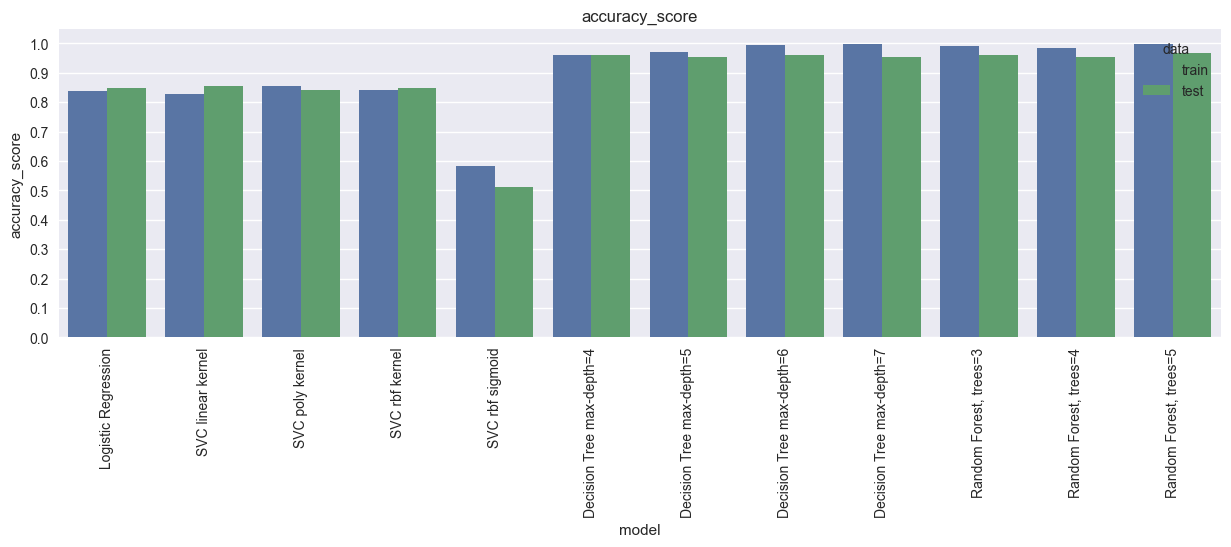

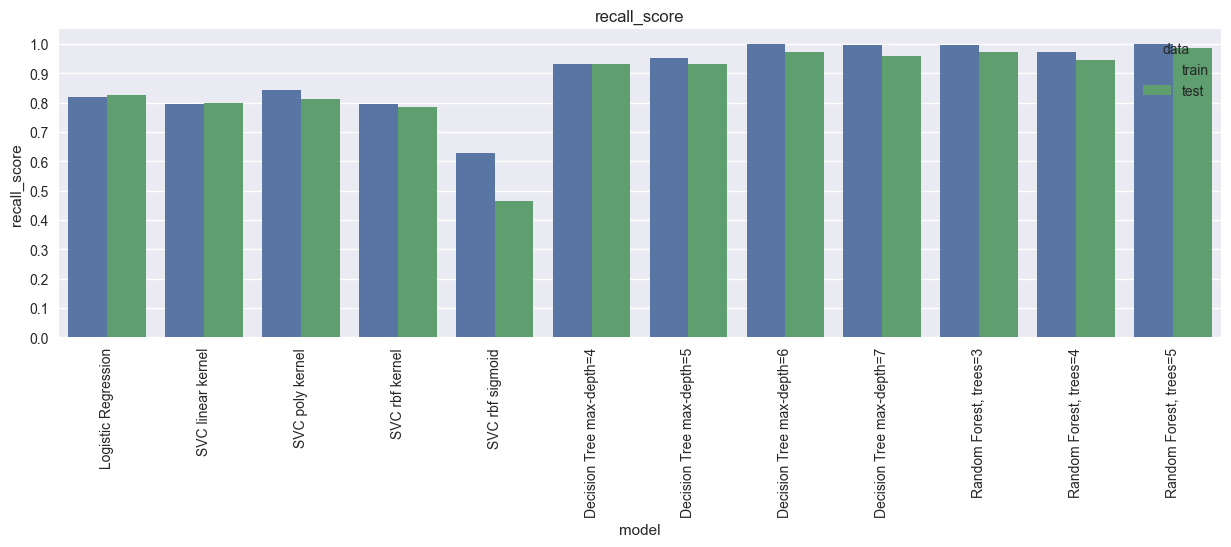

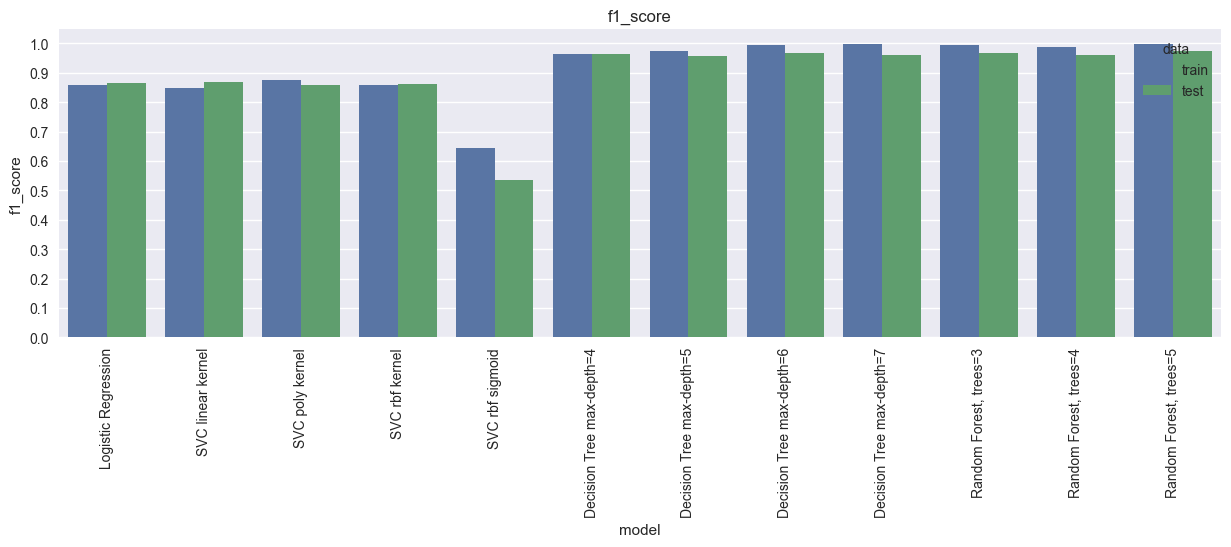

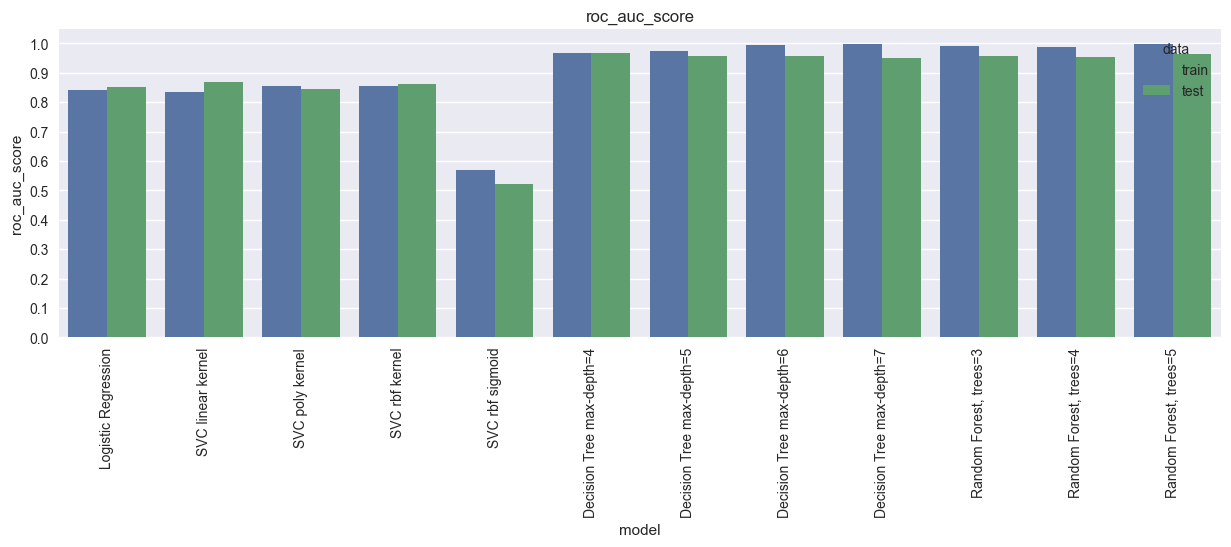

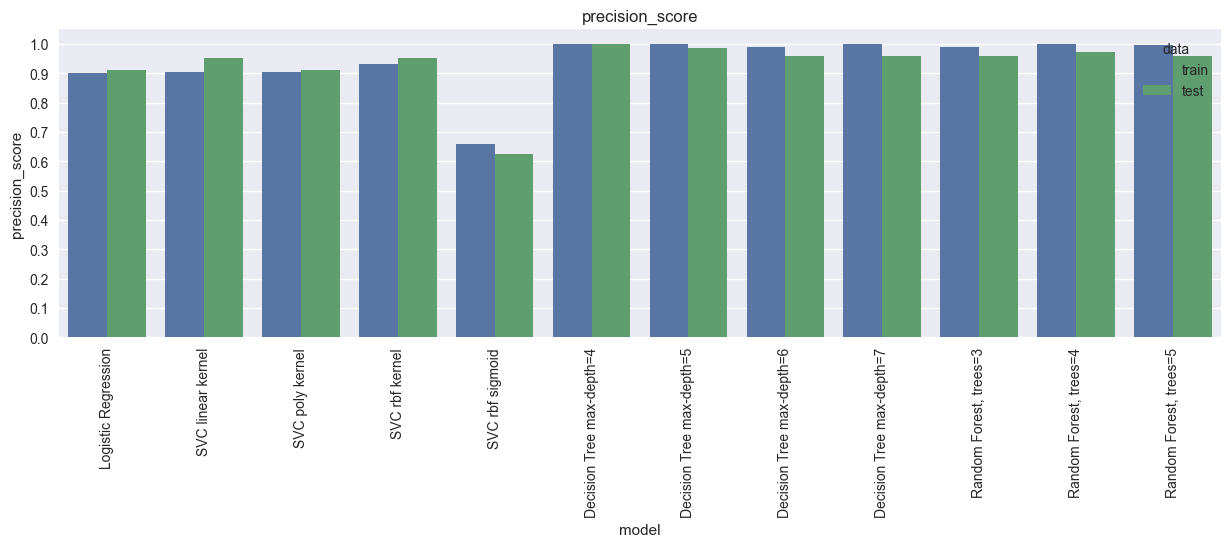

In [91]:
for metric in evaluation_dataset.columns: 
    if metric in ['model', 'data']:
        continue

    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model',y=metric, hue='data')
    plt.xticks(rotation = 90)
    plt.yticks(np.linspace(0,1,11))
    plt.show()

# Model Exploration

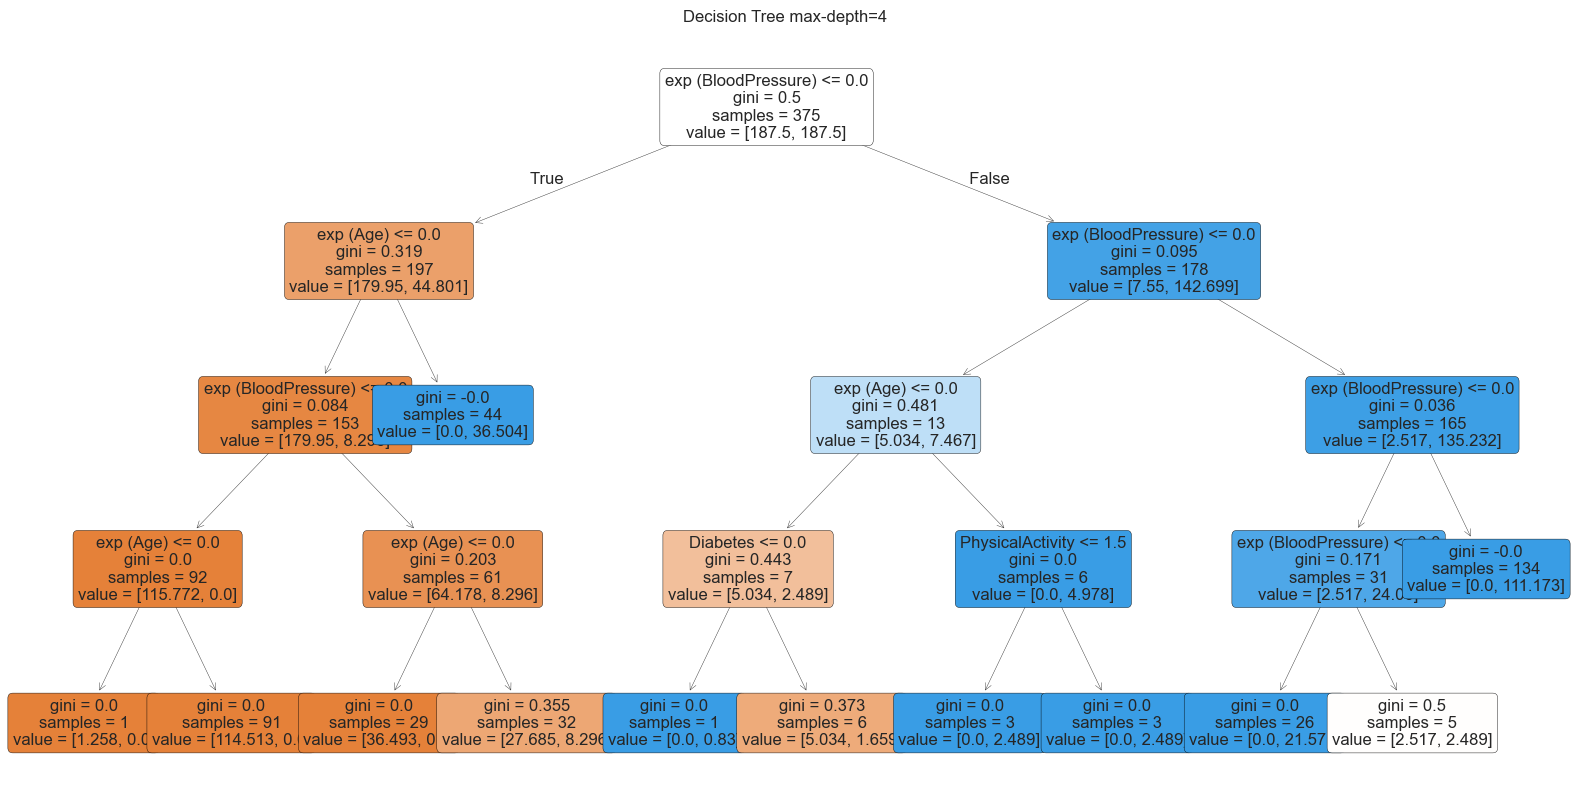

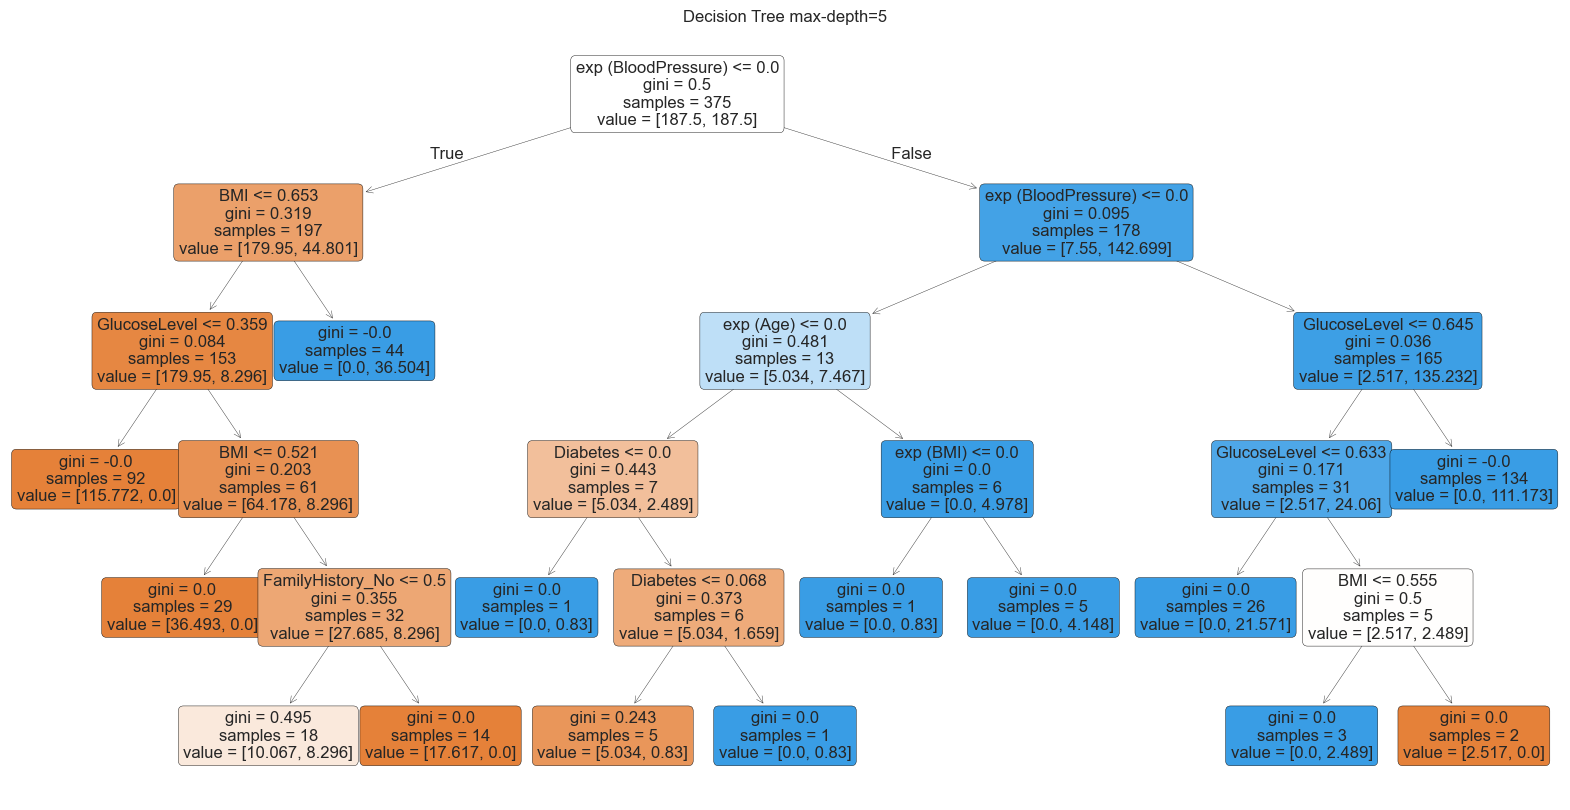

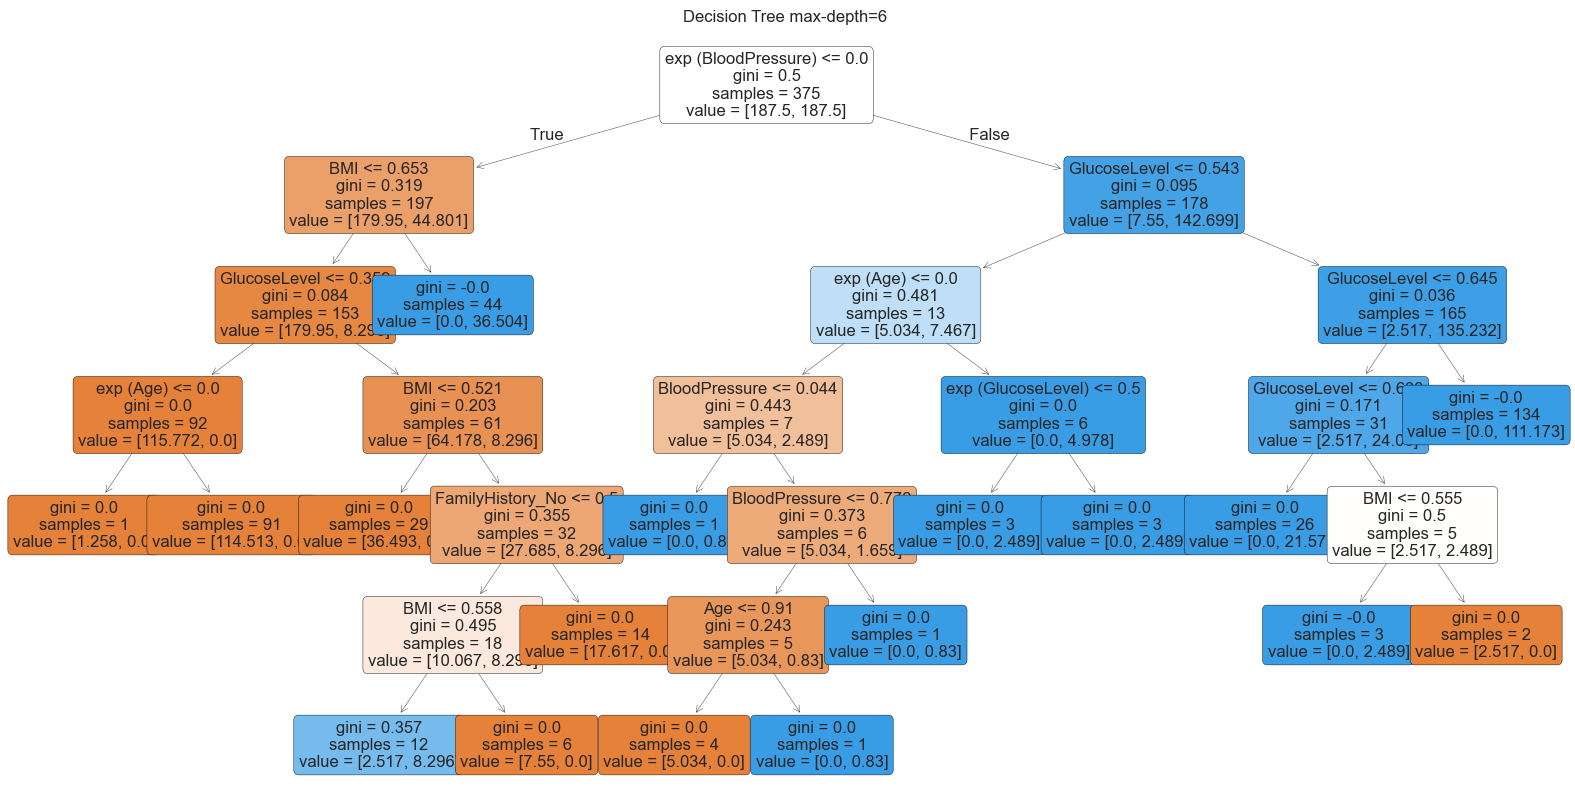

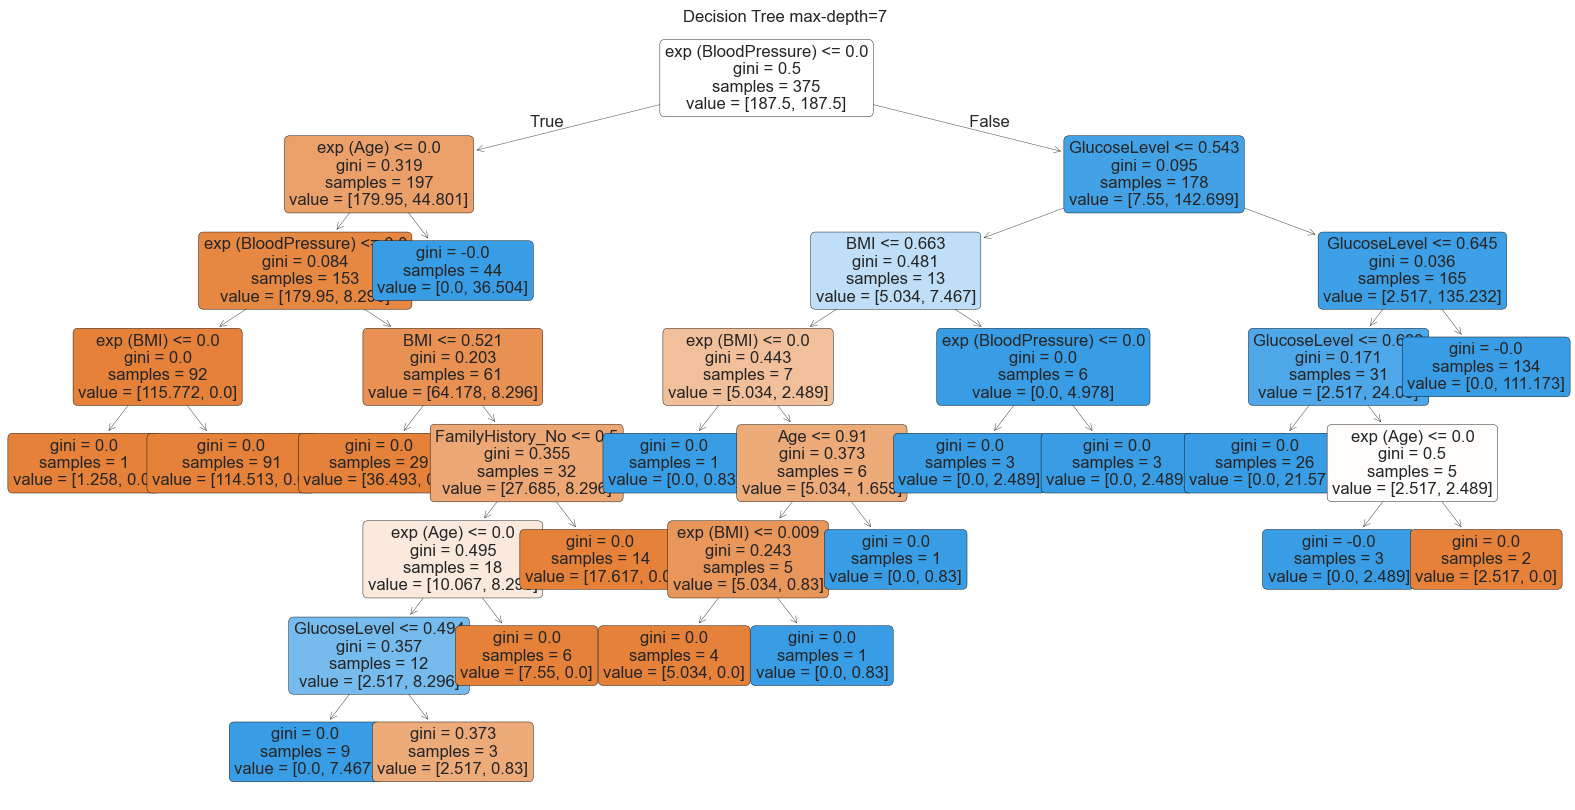

In [92]:
for model in models_list:
    if type(model.model) is DecisionTreeClassifier:
        tree_model = model.model

        plt.figure(figsize=(20, 10))
        
        plot_tree(tree_model, 
                feature_names=trainable_df.columns, 
                filled=True, 
                rounded=True, 
                fontsize=12)
                
        plt.title(model.name)
        plt.show()
        

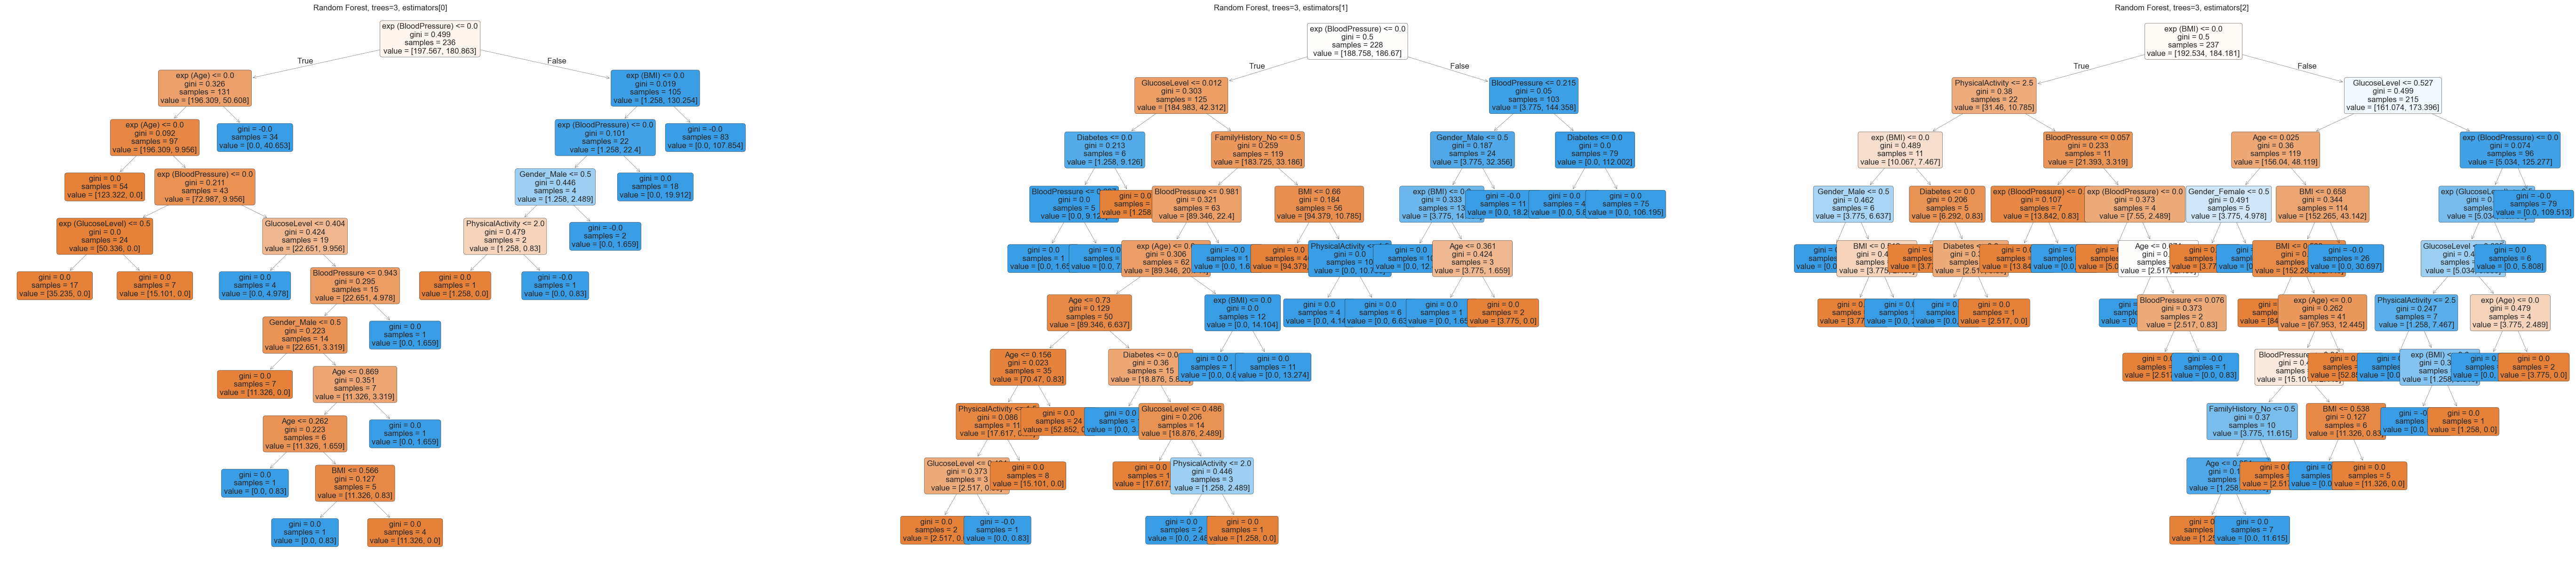

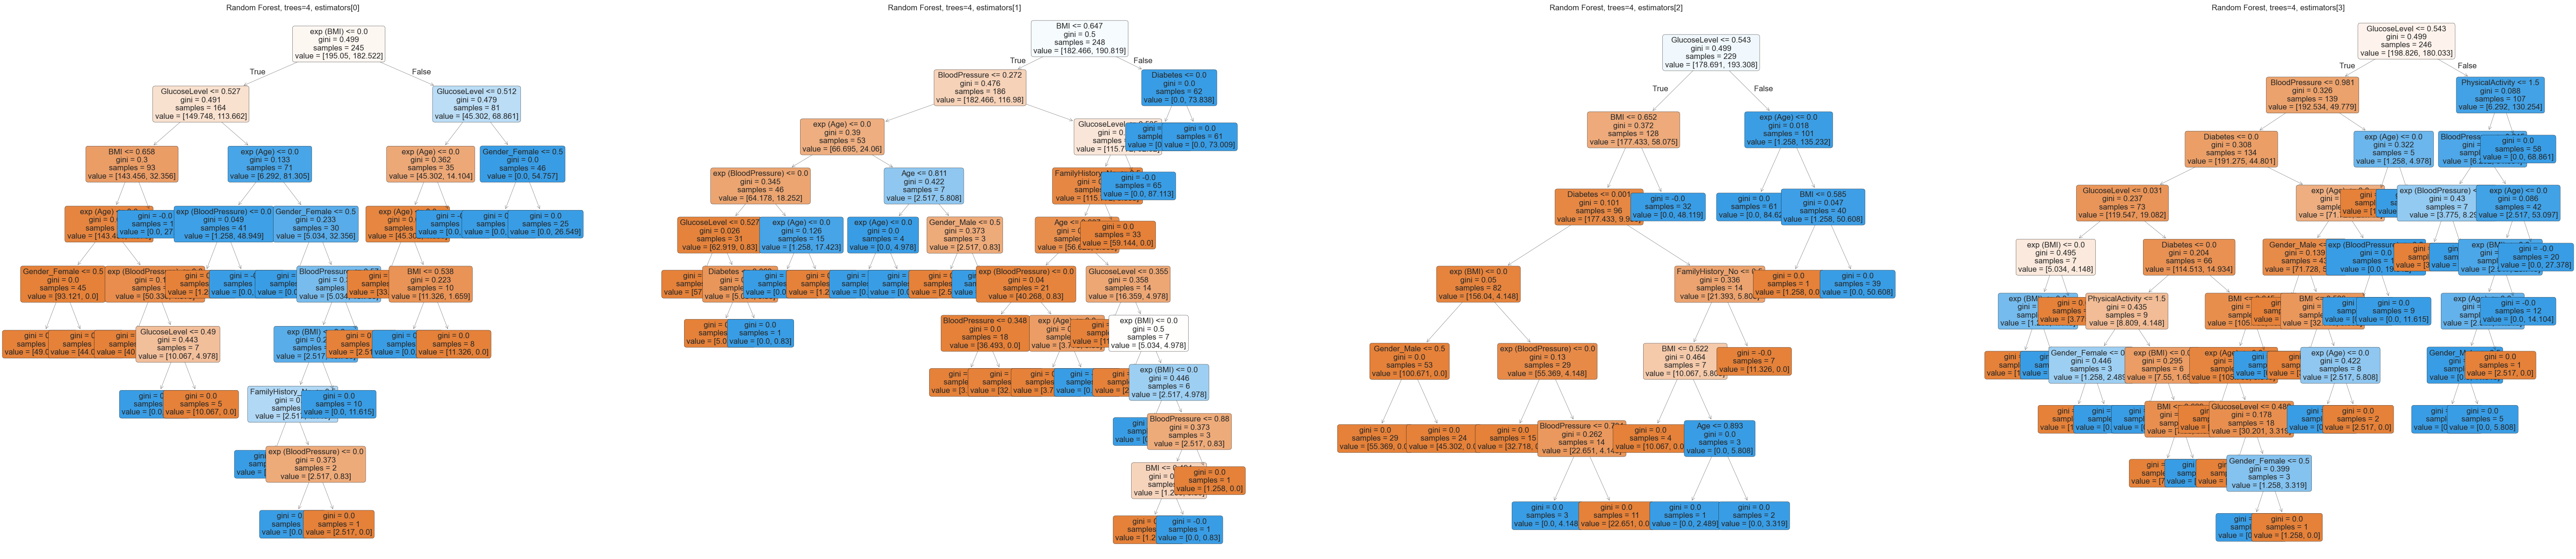

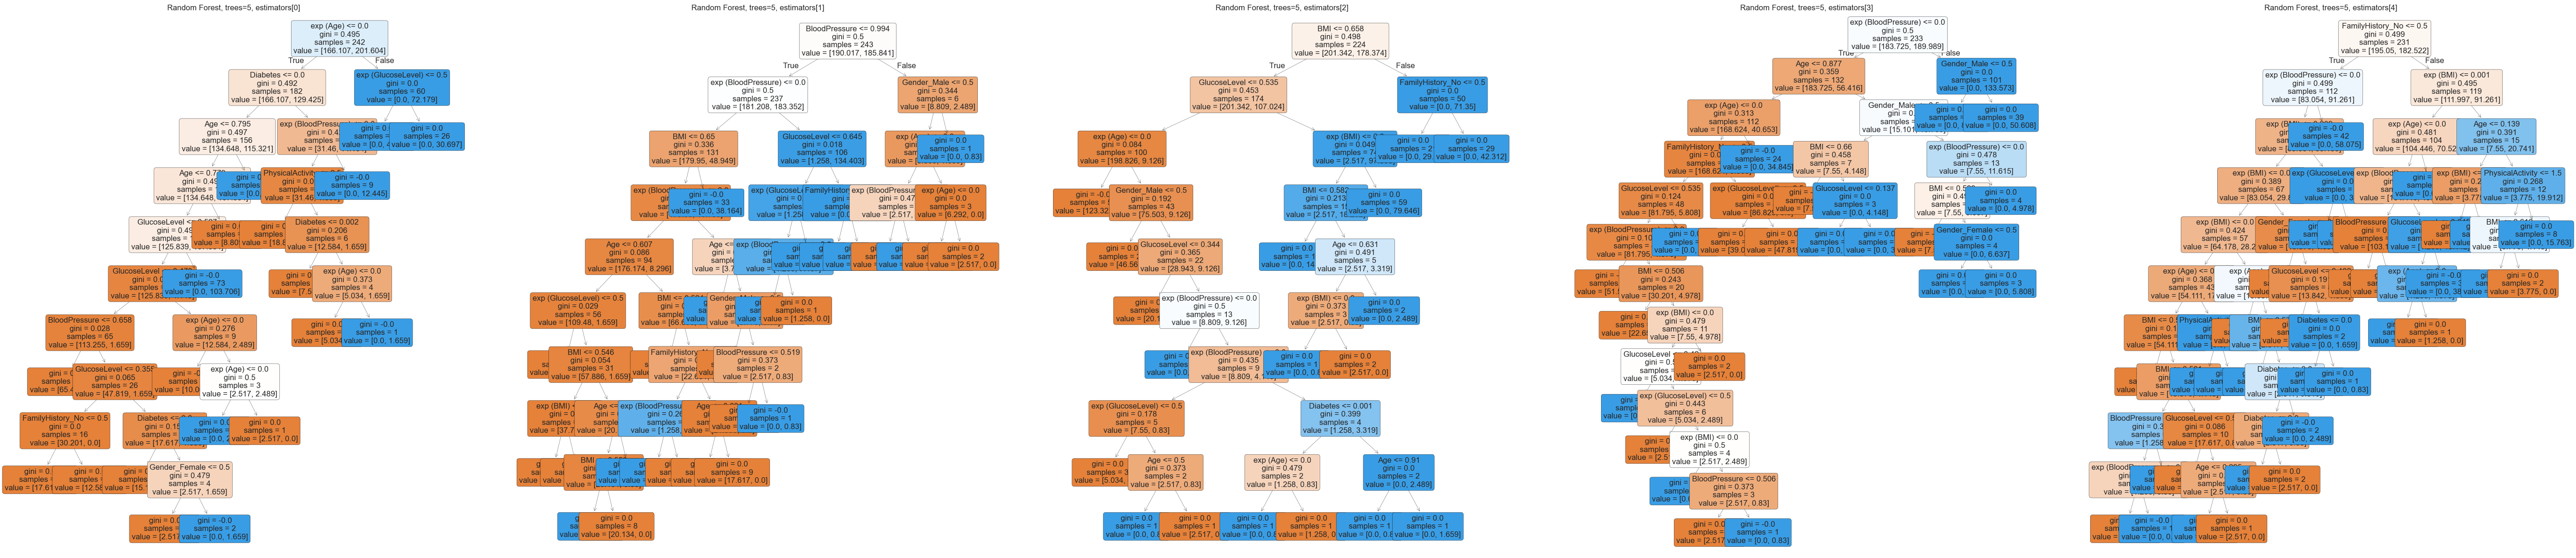

In [93]:
for model in models_list:
    if type(model.model) is RandomForestClassifier:
        rf_model = model.model

        plt.figure(figsize=(70, 15))

        for i, estimator in enumerate(rf_model.estimators_):
            plt.subplot(1, len(rf_model.estimators_), i+1)

            plot_tree(estimator, 
                    feature_names=trainable_df.columns, 
                    filled=True, 
                    rounded=True, 
                    fontsize=12)
            
            plt.title(f"{model.name}, estimators[{i}]")
        
        plt.show()

In [94]:
for model in models_list:
    if type(model.model) is AdaBoostClassifier:
        ada_model = model.model

        plt.figure(figsize=(45, 15))

        for i, estimator in enumerate(ada_model.estimators_):
            plt.subplot(1, len(ada_model.estimators_), i+1)

            plot_tree(estimator, 
                    feature_names=trainable_df.columns, 
                    filled=True, 
                    rounded=True, 
                    fontsize=12)
            
            plt.title(f"{model.name}, estimators[{i}]")
        
        plt.show()
        

# Caching

metrics

In [95]:
evaluation_dataset.to_csv("eval_dataset.csv")

y vs yhat

In [96]:
CAHCE_Y_VS_Y_HAT_DIR_NAME = 'models_predictions' 
os.makedirs(CAHCE_Y_VS_Y_HAT_DIR_NAME, exist_ok=True)

In [97]:
for model in models_list:
    pad_width = len(y_train) - len(y_test)

    pd.DataFrame(
        {
            'actual Y train' : y_train,
            'predict Y train' : model.y_train_hat,
            'Train Diff':  y_train - model.y_train_hat,
            'actual Y test' : np.pad(y_test, (0, pad_width), mode='constant', constant_values=-1),
            'predict Y test' : np.pad(model.y_test_hat, (0, pad_width), mode='constant', constant_values=-1),
            'Test Diff':  np.pad(y_test - model.y_test_hat, (0, pad_width), mode='constant'),

        }
    ).to_csv(f"{CAHCE_Y_VS_Y_HAT_DIR_NAME}/{model.name}.csv")

ecoders & scalers

In [98]:
CACHE_ENCODE_SCALE_DIR_NAME = 'encoders_scalers' 
os.makedirs(CACHE_ENCODE_SCALE_DIR_NAME, exist_ok=True)

In [99]:
def save_obj(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)        

def load_obj(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

In [100]:
save_obj( min_max_scaller, f"{CACHE_ENCODE_SCALE_DIR_NAME}/min-max-scaler.pickle" )

In [101]:
save_obj( label_encoder, f"{CACHE_ENCODE_SCALE_DIR_NAME}/label_encoder.pickle" )